In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 55.9 MB/s eta 0:00:00


In [ ]:
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 128293 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
import os
import sys
import urllib.request
import json
import pandas  as pd

In [ ]:
df = pd.read_csv('샵다이소_구글앱_리뷰.csv')
df

,Unnamed: 0,0
0,0,NaN
1,1,NaN
2,2,NaN
3,3,급히 만든 티가나는 앱. 적어도 홈플러스 앱정도의 수준은 되었으면 하는 바람으로 적...
4,4,구매가능매장찾기 기능 정확도가 너무 떨어져요;앱에 재고 없다고 뜨는데 막상 가게 가...
...,...,...
638,638,앱 왜이렇게 죽냐
639,639,뭔 어플을 이따위로 만들었어ㅋㅋ
640,640,저희 동네는 안되네요....
641,641,아무것도 안됨


In [ ]:
df.columns =['index','리뷰']

In [ ]:
del df['index']

In [ ]:
df

,리뷰
0,NaN
1,NaN
2,NaN
3,급히 만든 티가나는 앱. 적어도 홈플러스 앱정도의 수준은 되었으면 하는 바람으로 적...
4,구매가능매장찾기 기능 정확도가 너무 떨어져요;앱에 재고 없다고 뜨는데 막상 가게 가...
...,...
638,앱 왜이렇게 죽냐
639,뭔 어플을 이따위로 만들었어ㅋㅋ
640,저희 동네는 안되네요....
641,아무것도 안됨


In [ ]:
df.drop([1], axis=0, inplace=True)

In [ ]:
df

,리뷰
3,급히 만든 티가나는 앱. 적어도 홈플러스 앱정도의 수준은 되었으면 하는 바람으로 적...
4,구매가능매장찾기 기능 정확도가 너무 떨어져요;앱에 재고 없다고 뜨는데 막상 가게 가...
5,앱이 들어가면 바로뜨는게 아니라 진짜 계속 나갔다 들어와도 실행이 안됨.. 그리고 ...
6,다이소 물품이 배송된다는 것이 참 좋고 편리합니다! 하지만 앱 자체의 오류가 너무 ...
7,우선 배송서비스를 하는 매장 자체가 적음. 택배사를 통해 배송이 아니라 인근 매장에...
...,...
638,앱 왜이렇게 죽냐
639,뭔 어플을 이따위로 만들었어ㅋㅋ
640,저희 동네는 안되네요....
641,아무것도 안됨


In [ ]:
sdaiso_text = ''
for temp in df['리뷰']:
    sdaiso_text += temp
sdaiso_text = re.sub(r'[^가-힣a-zA-Z0-9]',' ',sdaiso_text)
sdaiso_text

'급히 만든 티가나는 앱  적어도 홈플러스 앱정도의 수준은 되었으면 하는 바람으로 적어보는 몇가지 불만사항 및 요청사항  1  스크롤 후 물건 클릭 한 다음 뒤로가면 목록 제일 위로 올라감  실컷 내렸는데 다시 처음부터 봐야하는 앱을 내놓다니    이건 진짜 쇼핑몰 기본이 안됨  2  각 매장별 재고상황 확인 불가  매장설정후 원하는 물건이 품절인 경우 아예 리스트에도 없고 검색조차 안됨  1 재고가 몇개 남았는지 2 품절상태인지 3 해당매장 입고예정 없는지 이 3가지 상황을 확인가능하였으면 함  즉 모든 다이소의 물건은 리스트에서 보여지되 품절이면 회색블러처리  입고예정없으면 사진 위에 X표시등이 되었으면 함  3  품절 물건에 대해 입고 주문 예약을 넣는 기능이 있으면 좋겠음  4  3번이 어려우면 적어도 입고 예정 날짜를 상세 설명에서 확인할수 있거나 입고 시 알람 기능 추가 구매가능매장찾기 기능 정확도가 너무 떨어져요 앱에 재고 없다고 뜨는데 막상 가게 가면 재고 수두룩 빽빽하고 그런 상품이 한 두개가 아니고 대부분이 그렇다는게   상품명이 강아지 커터칼이라고 적혀 있어서 그대로 검색해도 안 뜨길래 커터칼로 검색했더니 애니멀 커터칼로 등록되어있고 파우치를 검색해도 짱구 파우치는 안 뜨고 검색 정확도도 많이 떨어져요 앞으로 앱은 이용하지 않을 것 같네요 앱이 들어가면 바로뜨는게 아니라 진짜 계속 나갔다 들어와도 실행이 안됨   그리고 들어가져도 창 넘어가는게 너무 느리고 한번 나갔다 들어와도 계속 로그인하라고만 뜹니다   좀 개선좀 해줬으면 좋겠네요 아무리 사용자여도 사용자한테 편리한 사용을 제공해주면 좋겠어요 다이소 물품이 배송된다는 것이 참 좋고 편리합니다  하지만 앱 자체의 오류가 너무 많습니다   항상 네이트워크가 불안정하다고 뜨면서 접속이 안돼 어플을 지웠다가 깔아야 접속이 가능합니다   매번  앱 실행 속도도 느리며  상품 배송 중 망가지거나 액체가 세서 오는 곳도 많은데   환불이나 반품처리도 어렵네요 우선 배송서비스를 하는 매장 자체가 적음

In [ ]:
from konlpy.tag import Okt
import re
from collections import Counter
from wordcloud import WordCloud

# Okt 함수를 이용해 형태소 분석
okt = Okt()
line =[]

line = okt.pos(sdaiso_text)

print(line)

n_adj =[]
# 명사 또는 형용사인 단어만 n_adj에 넣어주기
for word, tag in line:
    if tag in ['Noun','Adjective']:
        if len(word) > 1:
            n_adj.append(word)
# 명사 또는 형용사인 단어 및 2글자 이상인 단어 선택 시
# n_adj = [word for wor

[('급히', 'Adjective'), ('만든', 'Verb'), ('티', 'Noun'), ('가나', 'Noun'), ('는', 'Josa'), ('앱', 'Noun'), ('적어도', 'Adverb'), ('홈플러스', 'Noun'), ('앱', 'Noun'), ('정도', 'Noun'), ('의', 'Josa'), ('수준', 'Noun'), ('은', 'Josa'), ('되었으면', 'Verb'), ('하는', 'Verb'), ('바람', 'Noun'), ('으로', 'Josa'), ('적어', 'Verb'), ('보는', 'Verb'), ('몇', 'Modifier'), ('가지', 'Noun'), ('불만', 'Noun'), ('사항', 'Noun'), ('및', 'Noun'), ('요청', 'Noun'), ('사항', 'Noun'), ('1', 'Number'), ('스', 'Noun'), ('크롤', 'Noun'), ('후', 'Noun'), ('물건', 'Noun'), ('클릭', 'Noun'), ('한', 'Verb'), ('다음', 'Noun'), ('뒤', 'Noun'), ('로', 'Josa'), ('가면', 'Noun'), ('목록', 'Noun'), ('제일', 'Noun'), ('위로', 'Noun'), ('올라감', 'Verb'), ('실컷', 'Noun'), ('내렸는데', 'Verb'), ('다시', 'Noun'), ('처음', 'Noun'), ('부터', 'Josa'), ('봐', 'Verb'), ('야하는', 'Adjective'), ('앱', 'Noun'), ('을', 'Josa'), ('내놓다니', 'Verb'), ('이건', 'Noun'), ('진짜', 'Noun'), ('쇼핑몰', 'Noun'), ('기본', 'Noun'), ('이', 'Josa'), ('안됨', 'Adjective'), ('2', 'Number'), ('각', 'Noun'), ('매장', 'Noun'), ('별', 'Noun'), ('재고', 

In [ ]:
#제외할 단어 추가
stop_words = "다이소" #추가할 때 띄어쓰기로 추가해주기
stop_words = set(stop_words.split(' '))
# 불용어를 제외한 단어만 남기기
n_adj = [word for word in n_adj if not word in stop_words]
n_adj
#가장 많이 나온 단어 100개 저장
counts = Counter(n_adj)
tags = counts.most_common(100)
tags

[('지역', 117),
 ('검색', 107),
 ('어플', 83),
 ('상품', 82),
 ('로그인', 81),
 ('재고', 76),
 ('가입', 73),
 ('픽업', 69),
 ('안됨', 67),
 ('주문', 65),
 ('서비스', 65),
 ('물건', 61),
 ('주소', 60),
 ('배송지', 55),
 ('입력', 52),
 ('등록', 50),
 ('제품', 50),
 ('진짜', 49),
 ('계속', 49),
 ('사용', 46),
 ('오류', 46),
 ('온라인', 45),
 ('회원', 44),
 ('배달', 41),
 ('가능', 40),
 ('하나', 39),
 ('구매', 38),
 ('이용', 38),
 ('선택', 37),
 ('확인', 36),
 ('불가', 35),
 ('다시', 34),
 ('품절', 33),
 ('근처', 33),
 ('없는', 32),
 ('있는', 31),
 ('안되고', 31),
 ('아이디', 29),
 ('안되는', 29),
 ('설정', 27),
 ('없다고', 26),
 ('고객', 26),
 ('자체', 25),
 ('연결', 25),
 ('다른', 25),
 ('화면', 25),
 ('장바구니', 24),
 ('그냥', 24),
 ('인터넷', 24),
 ('취소', 24),
 ('삭제', 24),
 ('가능한', 23),
 ('설치', 23),
 ('해도', 23),
 ('기능', 22),
 ('있는데', 22),
 ('결제', 22),
 ('개선', 21),
 ('직접', 21),
 ('입니다', 21),
 ('안되네요', 21),
 ('쓰레기', 21),
 ('무슨', 20),
 ('제대로', 20),
 ('처음', 19),
 ('접속', 19),
 ('좋아요', 19),
 ('없고', 18),
 ('찾기', 18),
 ('지점', 18),
 ('배송비', 18),
 ('리뷰', 18),
 ('있어서', 17),
 ('한번', 17),
 ('없음', 17),
 (

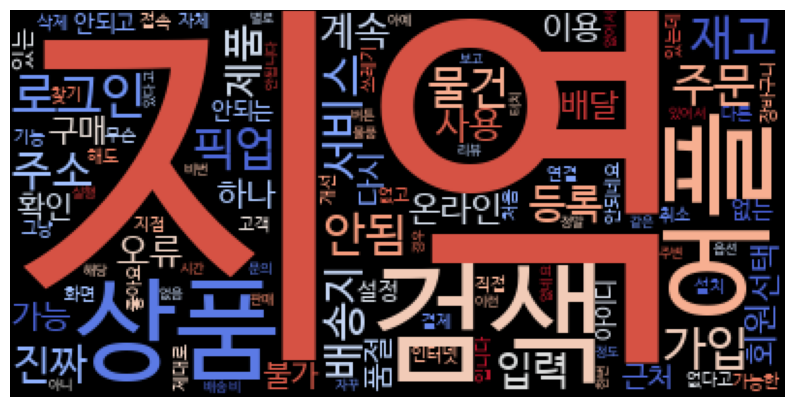

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
word_cloud = WordCloud(font_path=path, background_color='black',max_font_size=400,colormap='coolwarm').generate_from_frequencies(dict(tags))

# 사이즈 설정 및 화면에 출력
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
#워드클라우드 사진으로 저장
plt.savefig('샵다이소_구글플레이스토어_리뷰_워드클라우드.png', bbox_inches='tight')
plt.show()